# Stress Level Prediction of University Students (CU6051NP – Artificial Intelligence)

# Import Libraries

In [76]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [78]:
import pandas as pd
df = pd.read_csv('student_stress.csv')
display(df.head())
print("Dataset shape:", df.shape)
print(df.columns)
df.info()

,1. Age,2. Gender,3. University,4. Department,5. Academic Year,6. Current CGPA,7. Did you receive a waiver or scholarship at your university?,"1. In a semester, how often have you felt upset due to something that happened in your academic affairs?","2. In a semester, how often you felt as if you were unable to control important things in your academic affairs?","3. In a semester, how often you felt nervous and stressed because of academic pressure?","4. In a semester, how often you felt as if you could not cope with all the mandatory academic activities? (e.g, assignments, quiz, exams)","5. In a semester, how often you felt confident about your ability to handle your academic / university problems?","6. In a semester, how often you felt as if things in your academic life is going on your way?","7. In a semester, how often are you able to control irritations in your academic / university affairs?","8. In a semester, how often you felt as if your academic performance was on top?","9. In a semester, how often you got angered due to bad performance or low grades that is beyond your control?","10. In a semester, how often you felt as if academic difficulties are piling up so high that you could not overcome them?",Stress Value,Stress Label
0,18-22,Female,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,Second Year or Equivalent,2.50 - 2.99,No,3,4,3,2,2,1,2,2,4,4,29,High Perceived Stress
1,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,Third Year or Equivalent,3.00 - 3.39,No,3,3,4,2,3,2,2,2,2,3,24,Moderate Stress
2,18-22,Male,American International University Bangladesh (...,Engineering - CS / CSE / CSC / Similar to CS,Third Year or Equivalent,3.00 - 3.39,No,0,0,0,0,0,1,0,0,0,0,15,Moderate Stress
3,18-22,Male,American International University Bangladesh (...,Engineering - CS / CSE / CSC / Similar to CS,Third Year or Equivalent,3.00 - 3.39,No,3,1,2,1,4,3,2,2,3,2,17,Moderate Stress
4,18-22,Male,North South University (NSU),Engineering - CS / CSE / CSC / Similar to CS,Second Year or Equivalent,2.50 - 2.99,No,4,4,4,2,2,2,0,2,4,4,32,High Perceived Stress


Dataset shape: (2028, 19)
Index(['1. Age', '2. Gender', '3. University', '4. Department',
       '5. Academic Year', '6. Current CGPA',
       '7. Did you receive a waiver or scholarship at your university?',
       '1. In a semester, how often have you felt upset due to something that happened in your academic affairs? ',
       '2. In a semester, how often you felt as if you were unable to control important things in your academic affairs?',
       '3. In a semester, how often you felt nervous and stressed because of academic pressure? ',
       '4. In a semester, how often you felt as if you could not cope with all the mandatory academic activities? (e.g, assignments, quiz, exams) ',
       '5. In a semester, how often you felt confident about your ability to handle your academic / university problems?',
       '6. In a semester, how often you felt as if things in your academic life is going on your way? ',
       '7. In a semester, how often are you able to control irritations in y

# Basic cleaning + define target

In [80]:
df.isnull().sum()

1. Age                                                                                                                                        0
2. Gender                                                                                                                                     0
3. University                                                                                                                                 0
4. Department                                                                                                                                 0
5. Academic Year                                                                                                                              0
6. Current CGPA                                                                                                                               0
7. Did you receive a waiver or scholarship at your university?                                                                          

In [81]:
df.fillna(df.mean(numeric_only=True), inplace=True)
df.isnull().sum()

1. Age                                                                                                                                        0
2. Gender                                                                                                                                     0
3. University                                                                                                                                 0
4. Department                                                                                                                                 0
5. Academic Year                                                                                                                              0
6. Current CGPA                                                                                                                               0
7. Did you receive a waiver or scholarship at your university?                                                                          

# Duplicate Record Removal

In [83]:
print("Before removing duplicates:", df.shape)
df.drop_duplicates(inplace=True)
print("After removing duplicates:", df.shape)

Before removing duplicates: (2028, 19)
After removing duplicates: (2008, 19)


In [84]:
display(df.describe())


,"1. In a semester, how often have you felt upset due to something that happened in your academic affairs?","2. In a semester, how often you felt as if you were unable to control important things in your academic affairs?","3. In a semester, how often you felt nervous and stressed because of academic pressure?","4. In a semester, how often you felt as if you could not cope with all the mandatory academic activities? (e.g, assignments, quiz, exams)","5. In a semester, how often you felt confident about your ability to handle your academic / university problems?","6. In a semester, how often you felt as if things in your academic life is going on your way?","7. In a semester, how often are you able to control irritations in your academic / university affairs?","8. In a semester, how often you felt as if your academic performance was on top?","9. In a semester, how often you got angered due to bad performance or low grades that is beyond your control?","10. In a semester, how often you felt as if academic difficulties are piling up so high that you could not overcome them?",Stress Value
count,2008.000000,2008.000000,2008.000000,2008.00000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000
mean,2.354084,2.329681,2.713645,2.37251,2.178287,1.792829,1.933267,1.724104,2.429781,2.439741,23.010956
std,1.181835,1.159384,1.133436,1.22614,1.086717,1.101663,1.022190,1.134931,1.180328,1.169004,6.769747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.00000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,19.000000
50%,2.000000,2.000000,3.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,22.000000
75%,3.000000,3.000000,4.000000,3.00000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,27.000000
max,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,40.000000


In [85]:
df.fillna(method='ffill', inplace=True)

print("Dataset after handling missing values:")
display(df.head())


Dataset after handling missing values:


C:\Users\user\AppData\Local\Temp\ipykernel_5280\3667896871.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


,1. Age,2. Gender,3. University,4. Department,5. Academic Year,6. Current CGPA,7. Did you receive a waiver or scholarship at your university?,"1. In a semester, how often have you felt upset due to something that happened in your academic affairs?","2. In a semester, how often you felt as if you were unable to control important things in your academic affairs?","3. In a semester, how often you felt nervous and stressed because of academic pressure?","4. In a semester, how often you felt as if you could not cope with all the mandatory academic activities? (e.g, assignments, quiz, exams)","5. In a semester, how often you felt confident about your ability to handle your academic / university problems?","6. In a semester, how often you felt as if things in your academic life is going on your way?","7. In a semester, how often are you able to control irritations in your academic / university affairs?","8. In a semester, how often you felt as if your academic performance was on top?","9. In a semester, how often you got angered due to bad performance or low grades that is beyond your control?","10. In a semester, how often you felt as if academic difficulties are piling up so high that you could not overcome them?",Stress Value,Stress Label
0,18-22,Female,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,Second Year or Equivalent,2.50 - 2.99,No,3,4,3,2,2,1,2,2,4,4,29,High Perceived Stress
1,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,Third Year or Equivalent,3.00 - 3.39,No,3,3,4,2,3,2,2,2,2,3,24,Moderate Stress
2,18-22,Male,American International University Bangladesh (...,Engineering - CS / CSE / CSC / Similar to CS,Third Year or Equivalent,3.00 - 3.39,No,0,0,0,0,0,1,0,0,0,0,15,Moderate Stress
3,18-22,Male,American International University Bangladesh (...,Engineering - CS / CSE / CSC / Similar to CS,Third Year or Equivalent,3.00 - 3.39,No,3,1,2,1,4,3,2,2,3,2,17,Moderate Stress
4,18-22,Male,North South University (NSU),Engineering - CS / CSE / CSC / Similar to CS,Second Year or Equivalent,2.50 - 2.99,No,4,4,4,2,2,2,0,2,4,4,32,High Perceived Stress


In [86]:
import pandas as pd

df = pd.read_csv('student_stress.csv')
display(df.head())
print(df.columns.tolist())


,1. Age,2. Gender,3. University,4. Department,5. Academic Year,6. Current CGPA,7. Did you receive a waiver or scholarship at your university?,"1. In a semester, how often have you felt upset due to something that happened in your academic affairs?","2. In a semester, how often you felt as if you were unable to control important things in your academic affairs?","3. In a semester, how often you felt nervous and stressed because of academic pressure?","4. In a semester, how often you felt as if you could not cope with all the mandatory academic activities? (e.g, assignments, quiz, exams)","5. In a semester, how often you felt confident about your ability to handle your academic / university problems?","6. In a semester, how often you felt as if things in your academic life is going on your way?","7. In a semester, how often are you able to control irritations in your academic / university affairs?","8. In a semester, how often you felt as if your academic performance was on top?","9. In a semester, how often you got angered due to bad performance or low grades that is beyond your control?","10. In a semester, how often you felt as if academic difficulties are piling up so high that you could not overcome them?",Stress Value,Stress Label
0,18-22,Female,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,Second Year or Equivalent,2.50 - 2.99,No,3,4,3,2,2,1,2,2,4,4,29,High Perceived Stress
1,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,Third Year or Equivalent,3.00 - 3.39,No,3,3,4,2,3,2,2,2,2,3,24,Moderate Stress
2,18-22,Male,American International University Bangladesh (...,Engineering - CS / CSE / CSC / Similar to CS,Third Year or Equivalent,3.00 - 3.39,No,0,0,0,0,0,1,0,0,0,0,15,Moderate Stress
3,18-22,Male,American International University Bangladesh (...,Engineering - CS / CSE / CSC / Similar to CS,Third Year or Equivalent,3.00 - 3.39,No,3,1,2,1,4,3,2,2,3,2,17,Moderate Stress
4,18-22,Male,North South University (NSU),Engineering - CS / CSE / CSC / Similar to CS,Second Year or Equivalent,2.50 - 2.99,No,4,4,4,2,2,2,0,2,4,4,32,High Perceived Stress


['1. Age', '2. Gender', '3. University', '4. Department', '5. Academic Year', '6. Current CGPA', '7. Did you receive a waiver or scholarship at your university?', '1. In a semester, how often have you felt upset due to something that happened in your academic affairs? ', '2. In a semester, how often you felt as if you were unable to control important things in your academic affairs?', '3. In a semester, how often you felt nervous and stressed because of academic pressure? ', '4. In a semester, how often you felt as if you could not cope with all the mandatory academic activities? (e.g, assignments, quiz, exams) ', '5. In a semester, how often you felt confident about your ability to handle your academic / university problems?', '6. In a semester, how often you felt as if things in your academic life is going on your way? ', '7. In a semester, how often are you able to control irritations in your academic / university affairs? ', '8. In a semester, how often you felt as if your academic

# Feature/Target split

In [88]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = [
    '1. Age',
    '2. Gender',
    '3. University',
    '4. Department',
    '5. Academic Year',
    '6. Current CGPA',
    '7. Did you receive a waiver or scholarship at your university?'
]

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

display(df.head())


,1. Age,2. Gender,3. University,4. Department,5. Academic Year,6. Current CGPA,7. Did you receive a waiver or scholarship at your university?,"1. In a semester, how often have you felt upset due to something that happened in your academic affairs?","2. In a semester, how often you felt as if you were unable to control important things in your academic affairs?","3. In a semester, how often you felt nervous and stressed because of academic pressure?","4. In a semester, how often you felt as if you could not cope with all the mandatory academic activities? (e.g, assignments, quiz, exams)","5. In a semester, how often you felt confident about your ability to handle your academic / university problems?","6. In a semester, how often you felt as if things in your academic life is going on your way?","7. In a semester, how often are you able to control irritations in your academic / university affairs?","8. In a semester, how often you felt as if your academic performance was on top?","9. In a semester, how often you got angered due to bad performance or low grades that is beyond your control?","10. In a semester, how often you felt as if academic difficulties are piling up so high that you could not overcome them?",Stress Value,Stress Label
0,0,0,8,2,3,0,0,3,4,3,2,2,1,2,2,4,4,29,High Perceived Stress
1,0,1,8,2,4,1,0,3,3,4,2,3,2,2,2,2,3,24,Moderate Stress
2,0,1,0,2,4,1,0,0,0,0,0,0,1,0,0,0,0,15,Moderate Stress
3,0,1,0,2,4,1,0,3,1,2,1,4,3,2,2,3,2,17,Moderate Stress
4,0,1,10,2,3,0,0,4,4,4,2,2,2,0,2,4,4,32,High Perceived Stress


In [89]:
X = df.drop(columns=['Stress Label', 'Stress Value'], errors='ignore')

y = df['Stress Label']

print("Feature variables preview:")
display(X.head())

print("Target variable preview:")
display(y.head())


Feature variables preview:


,1. Age,2. Gender,3. University,4. Department,5. Academic Year,6. Current CGPA,7. Did you receive a waiver or scholarship at your university?,"1. In a semester, how often have you felt upset due to something that happened in your academic affairs?","2. In a semester, how often you felt as if you were unable to control important things in your academic affairs?","3. In a semester, how often you felt nervous and stressed because of academic pressure?","4. In a semester, how often you felt as if you could not cope with all the mandatory academic activities? (e.g, assignments, quiz, exams)","5. In a semester, how often you felt confident about your ability to handle your academic / university problems?","6. In a semester, how often you felt as if things in your academic life is going on your way?","7. In a semester, how often are you able to control irritations in your academic / university affairs?","8. In a semester, how often you felt as if your academic performance was on top?","9. In a semester, how often you got angered due to bad performance or low grades that is beyond your control?","10. In a semester, how often you felt as if academic difficulties are piling up so high that you could not overcome them?"
0,0,0,8,2,3,0,0,3,4,3,2,2,1,2,2,4,4
1,0,1,8,2,4,1,0,3,3,4,2,3,2,2,2,2,3
2,0,1,0,2,4,1,0,0,0,0,0,0,1,0,0,0,0
3,0,1,0,2,4,1,0,3,1,2,1,4,3,2,2,3,2
4,0,1,10,2,3,0,0,4,4,4,2,2,2,0,2,4,4


Target variable preview:


0    High Perceived Stress
1          Moderate Stress
2          Moderate Stress
3          Moderate Stress
4    High Perceived Stress
Name: Stress Label, dtype: object

# Train-test split

In [91]:
non_numeric = df.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric)


Non-numeric columns: Index(['Stress Label'], dtype='object')


In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Number of training samples: {len(X_train)}")
print(f"Number of testing samples: {len(X_test)}")


Number of training samples: 1622
Number of testing samples: 406


In [93]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1622, 17)
X_test shape: (406, 17)
y_train shape: (1622,)
y_test shape: (406,)


In [94]:
X.dtypes


1. Age                                                                                                                                        int32
2. Gender                                                                                                                                     int32
3. University                                                                                                                                 int32
4. Department                                                                                                                                 int32
5. Academic Year                                                                                                                              int32
6. Current CGPA                                                                                                                               int32
7. Did you receive a waiver or scholarship at your university?                                                  

# Train models (RF, SVM, Logistic Regression)

In [96]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,  
    random_state=42  
)

rf_model.fit(X_train, y_train)

print("Random Forest model trained successfully!")

Random Forest model trained successfully!


In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))


Random Forest Accuracy: 0.9384236453201971


In [98]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit scaler on training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [99]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm = SVC(kernel='rbf')
svm.fit(X_train_scaled, y_train)        
svm_predictions = svm.predict(X_test_scaled)

print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))


SVM Accuracy: 0.9630541871921182


In [100]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)         
lr_predictions = lr.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_predictions))


Logistic Regression Accuracy: 0.9926108374384236


In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Random Forest predictions (first 10):", rf_pred[:10])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm = SVC(kernel='rbf')
svm.fit(X_train_scaled, y_train)
svm_pred = svm.predict(X_test_scaled)
print("SVM predictions (first 10):", svm_pred[:10])

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)
print("Logistic Regression predictions (first 10):", lr_pred[:10])


Random Forest predictions (first 10): ['Moderate Stress' 'Moderate Stress' 'High Perceived Stress'
 'Moderate Stress' 'Moderate Stress' 'High Perceived Stress'
 'High Perceived Stress' 'High Perceived Stress' 'High Perceived Stress'
 'High Perceived Stress']
SVM predictions (first 10): ['Moderate Stress' 'Moderate Stress' 'High Perceived Stress'
 'Moderate Stress' 'Moderate Stress' 'High Perceived Stress'
 'High Perceived Stress' 'High Perceived Stress' 'High Perceived Stress'
 'High Perceived Stress']
Logistic Regression predictions (first 10): ['Moderate Stress' 'Moderate Stress' 'High Perceived Stress'
 'Moderate Stress' 'Moderate Stress' 'High Perceived Stress'
 'Moderate Stress' 'High Perceived Stress' 'High Perceived Stress'
 'High Perceived Stress']


# Evaluation (accuracy + report + confusion matrix)

Random Forest Accuracy: 0.94
SVM Accuracy: 0.96
Logistic Regression Accuracy: 0.99

Random Forest Classification Report:
                        precision    recall  f1-score   support

High Perceived Stress       0.95      0.90      0.93       115
           Low Stress       0.92      0.58      0.71        19
      Moderate Stress       0.93      0.98      0.96       272

             accuracy                           0.94       406
            macro avg       0.93      0.82      0.86       406
         weighted avg       0.94      0.94      0.94       406


SVM Classification Report:
                        precision    recall  f1-score   support

High Perceived Stress       0.97      0.97      0.97       115
           Low Stress       0.88      0.74      0.80        19
      Moderate Stress       0.97      0.98      0.97       272

             accuracy                           0.96       406
            macro avg       0.94      0.89      0.91       406
         weighted avg    

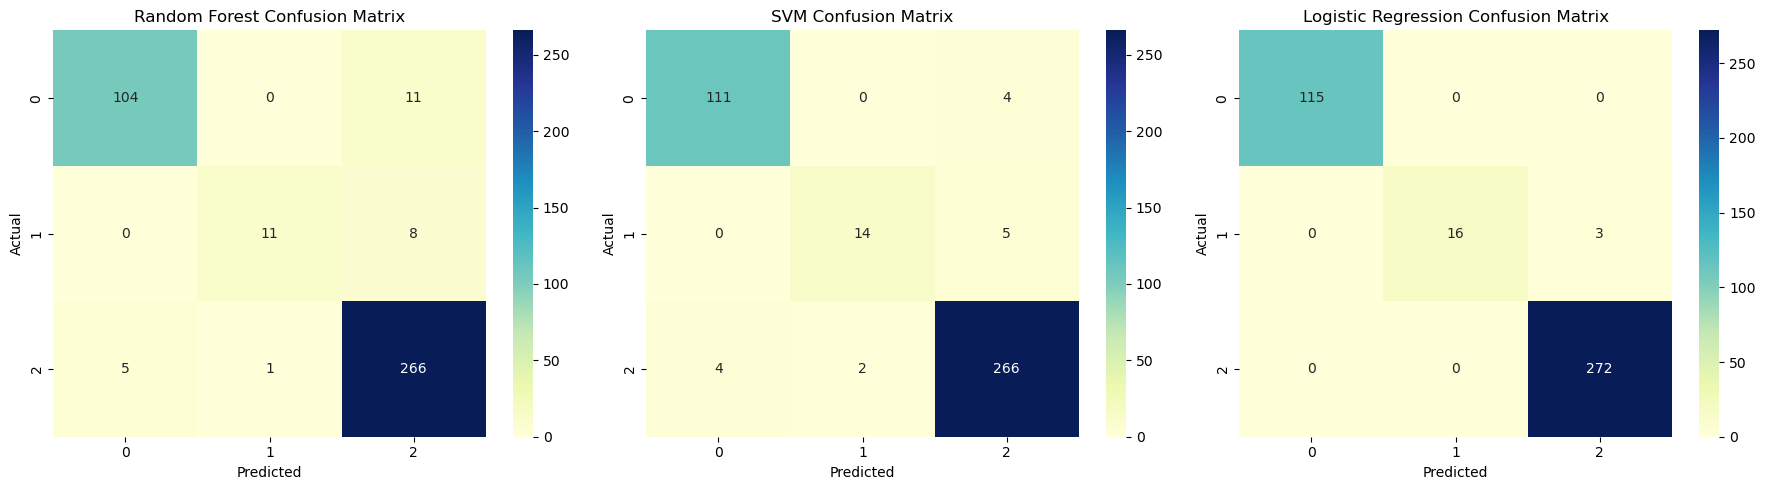

C:\Users\user\AppData\Local\Temp\ipykernel_5280\1419545193.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(models.keys()), y=accuracy_scores, palette="viridis")


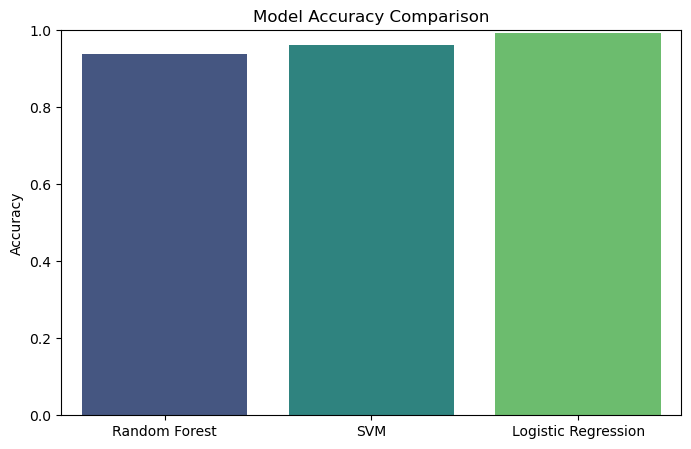

In [103]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

rf_acc = accuracy_score(y_test, rf_pred)
svm_acc = accuracy_score(y_test, svm_pred)
lr_acc = accuracy_score(y_test, lr_pred)

print(f"Random Forest Accuracy: {rf_acc:.2f}")
print(f"SVM Accuracy: {svm_acc:.2f}")
print(f"Logistic Regression Accuracy: {lr_acc:.2f}")


print("\nRandom Forest Classification Report:\n", classification_report(y_test, rf_pred))
print("\nSVM Classification Report:\n", classification_report(y_test, svm_pred))
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, lr_pred))


models = {
    'Random Forest': rf_pred,
    'SVM': svm_pred,
    'Logistic Regression': lr_pred
}

plt.figure(figsize=(18,5))

for i, (name, pred) in enumerate(models.items(), 1):
    cm = confusion_matrix(y_test, pred)
    plt.subplot(1, 3, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', cbar=True)
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()


accuracy_scores = [rf_acc, svm_acc, lr_acc]

plt.figure(figsize=(8,5))
sns.barplot(x=list(models.keys()), y=accuracy_scores, palette="viridis")
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()


In [104]:
df = df.dropna()  # drop rows with missing values
print("Dataset shape after dropping missing values:", df.shape)

Dataset shape after dropping missing values: (2028, 19)


C:\Users\user\AppData\Local\Temp\ipykernel_5280\2429848963.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(models.keys()), y=accuracy_scores, palette="viridis")


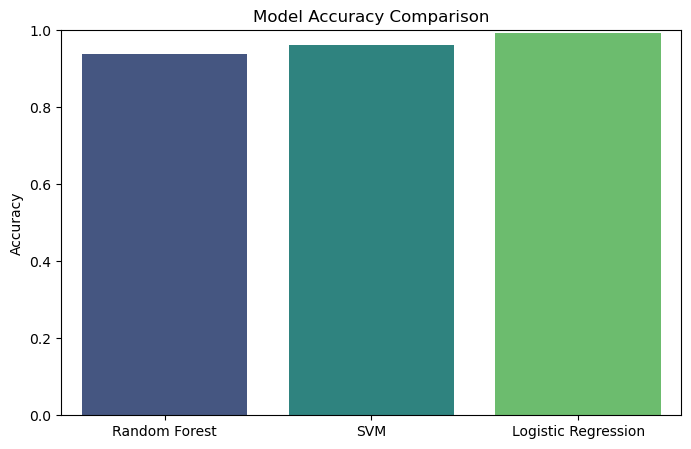

In [105]:
accuracy_scores = [accuracy_score(y_test, rf_pred),
                   accuracy_score(y_test, svm_pred),
                   accuracy_score(y_test, lr_pred)]

plt.figure(figsize=(8,5))
sns.barplot(x=list(models.keys()), y=accuracy_scores, palette="viridis")
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()

In [106]:
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)
df = df.drop_duplicates()

Number of duplicate rows: 20


In [107]:
print(df.columns)


Index(['1. Age', '2. Gender', '3. University', '4. Department',
       '5. Academic Year', '6. Current CGPA',
       '7. Did you receive a waiver or scholarship at your university?',
       '1. In a semester, how often have you felt upset due to something that happened in your academic affairs? ',
       '2. In a semester, how often you felt as if you were unable to control important things in your academic affairs?',
       '3. In a semester, how often you felt nervous and stressed because of academic pressure? ',
       '4. In a semester, how often you felt as if you could not cope with all the mandatory academic activities? (e.g, assignments, quiz, exams) ',
       '5. In a semester, how often you felt confident about your ability to handle your academic / university problems?',
       '6. In a semester, how often you felt as if things in your academic life is going on your way? ',
       '7. In a semester, how often are you able to control irritations in your academic / university 

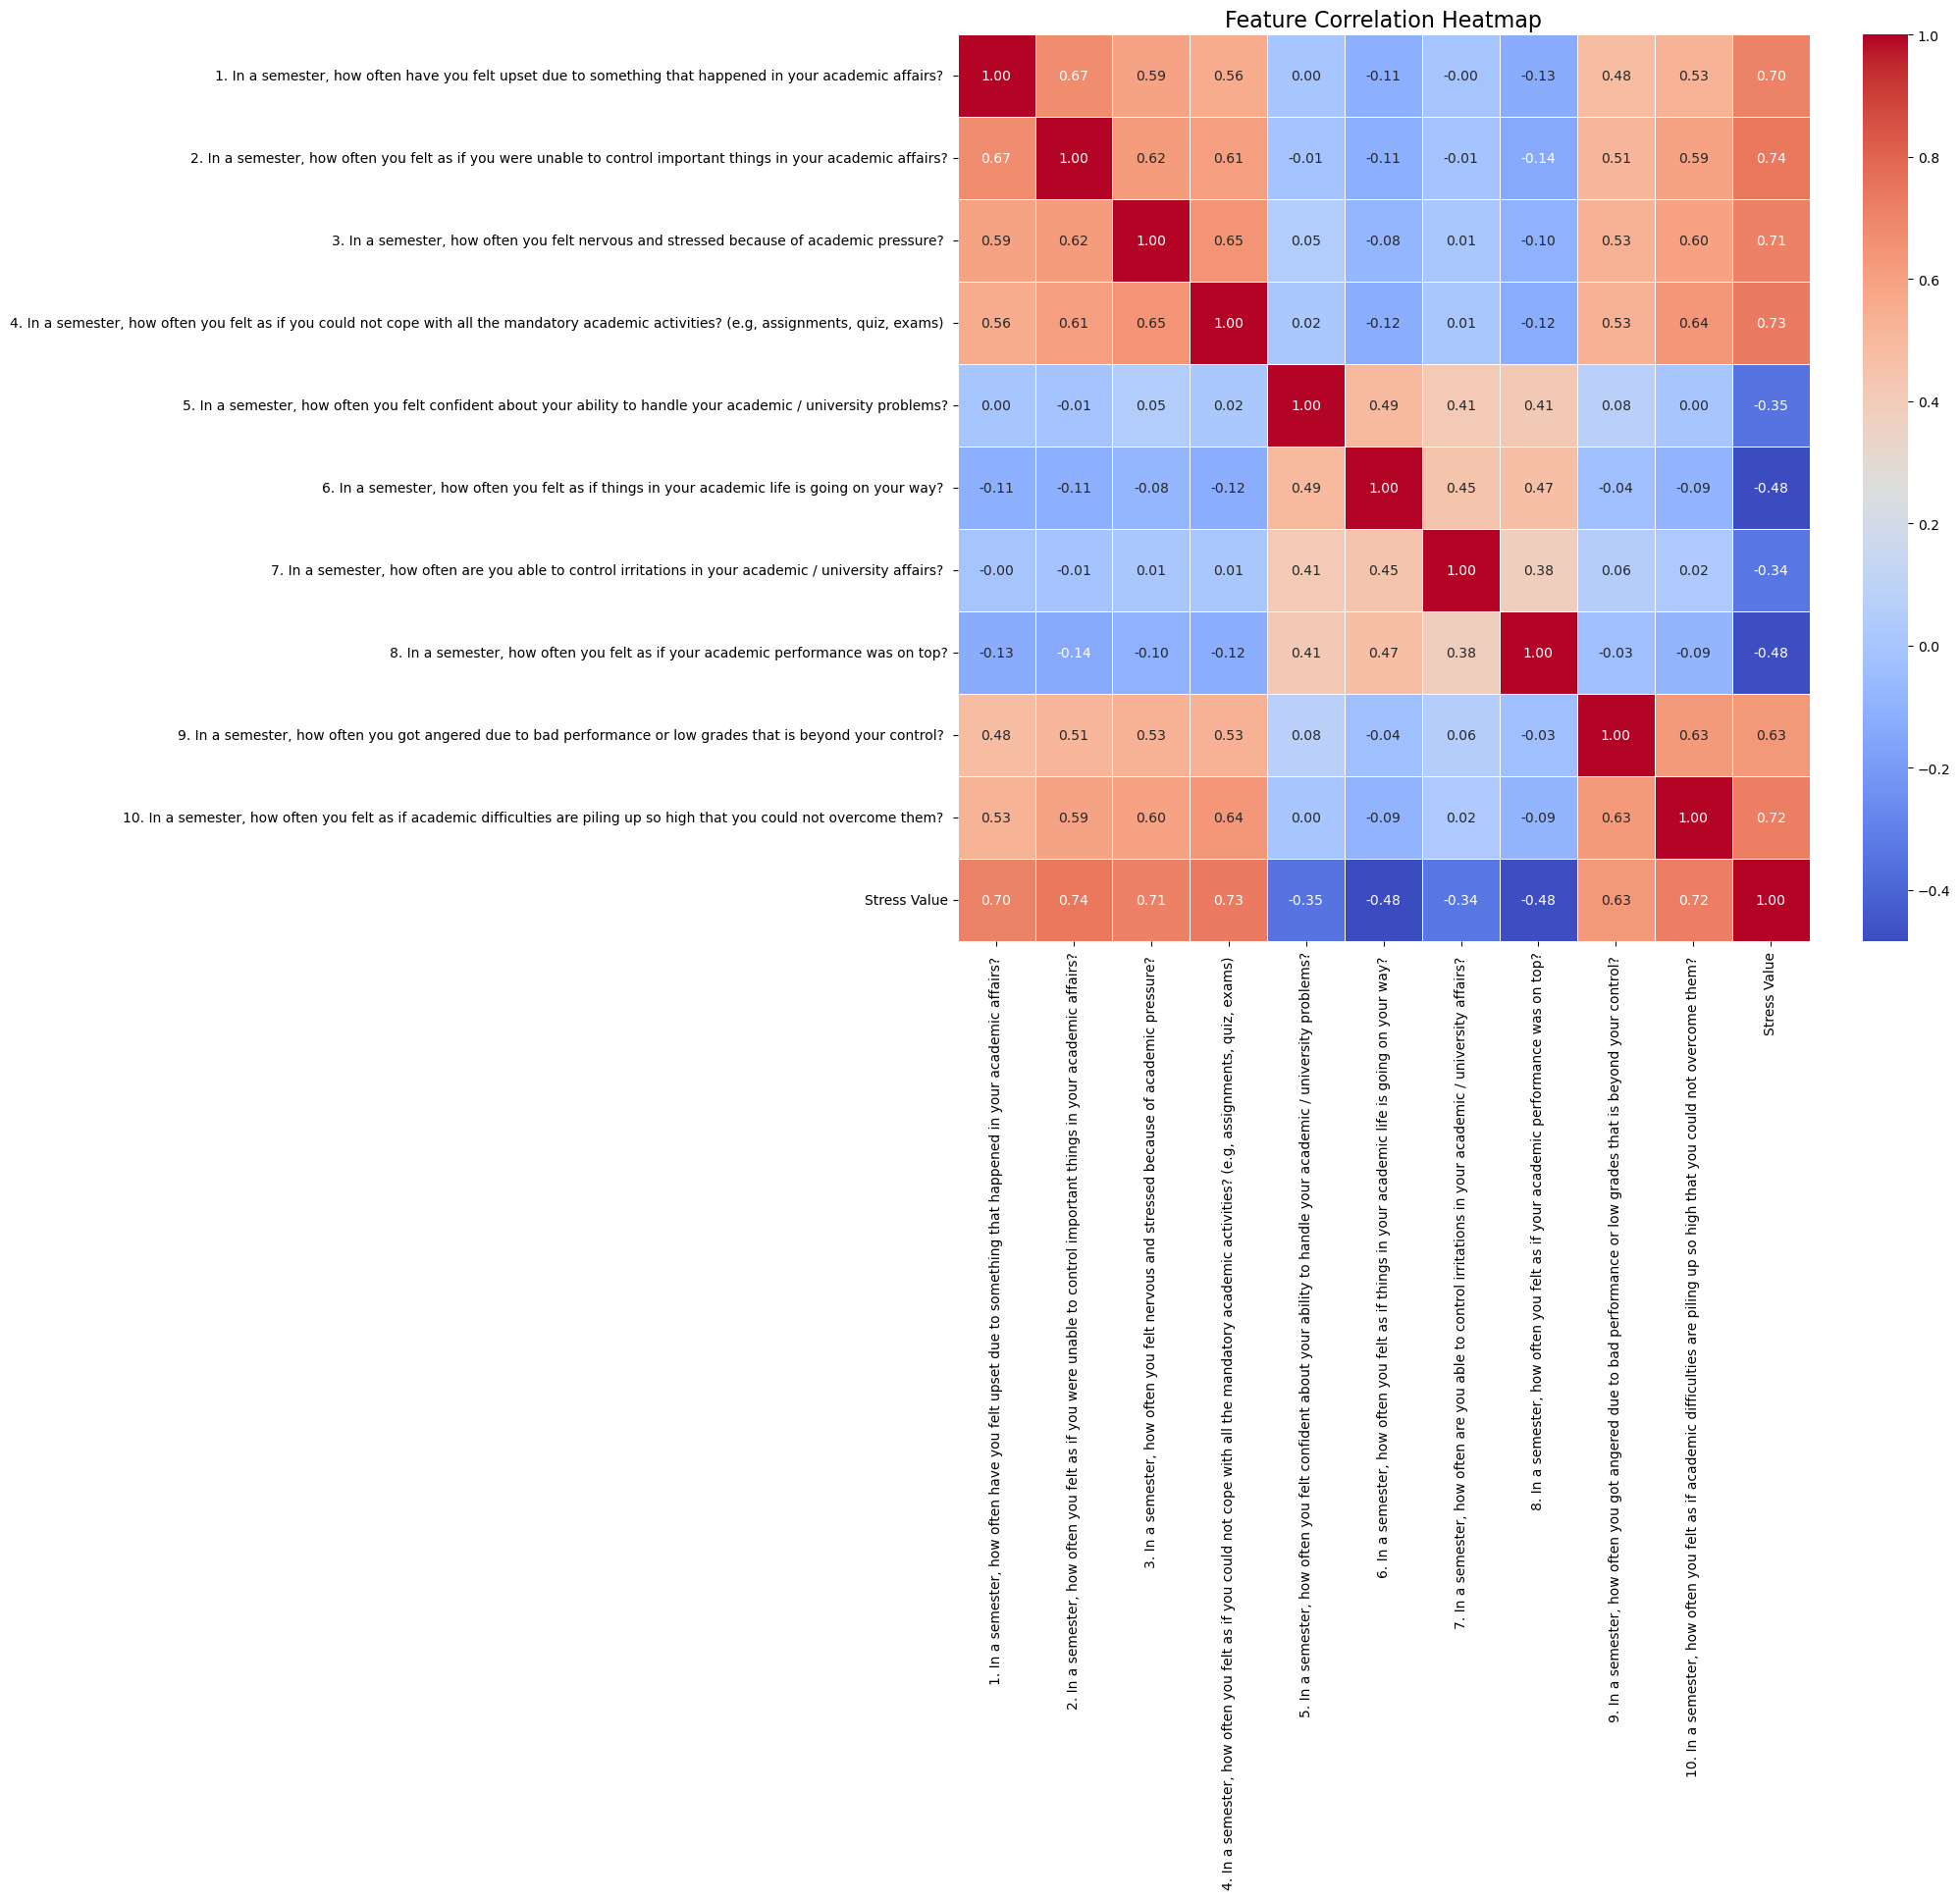

In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv('student_stress.csv')


categorical_cols = ['1. Age', '2. Gender', '3. University', '4. Department',
                    '5. Academic Year', '7. Did you receive a waiver or scholarship at your university?']

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns


plt.figure(figsize=(14,12))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()


#  Feature Importance Analysis

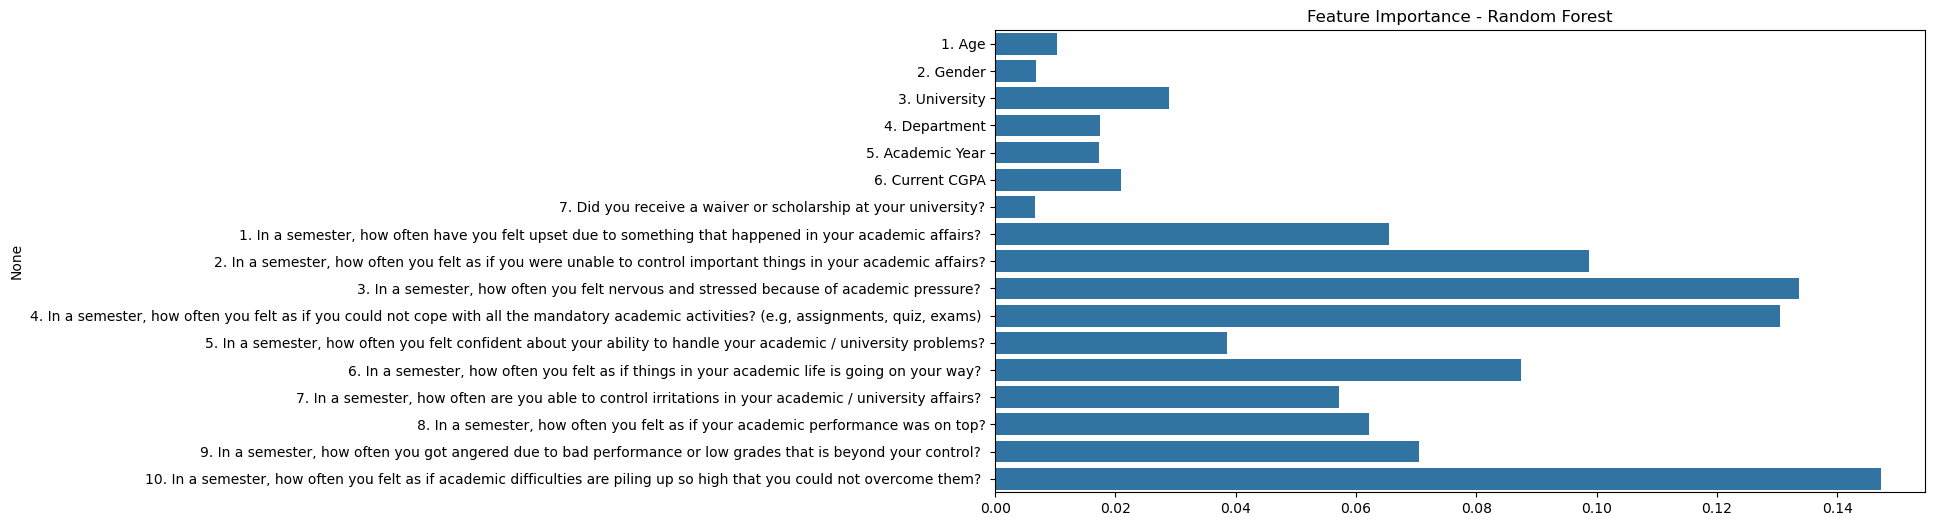

In [110]:
importances = rf.feature_importances_
feature_names = X.columns

plt.figure(figsize=(12,6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance - Random Forest")
plt.show()


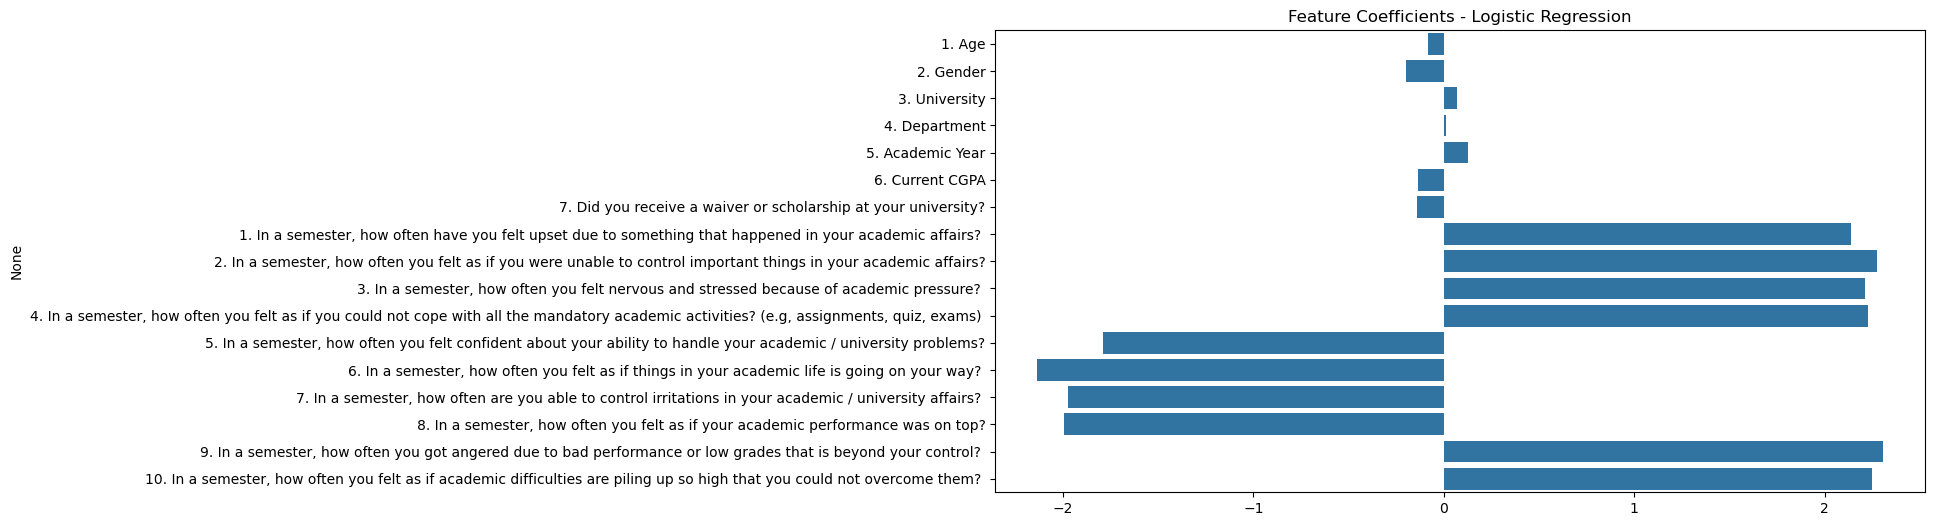

In [111]:
lr_coeff = lr.coef_[0]  
feature_names = X.columns

plt.figure(figsize=(12,6))
sns.barplot(x=lr_coeff, y=feature_names)
plt.title("Feature Coefficients - Logistic Regression")
plt.show()


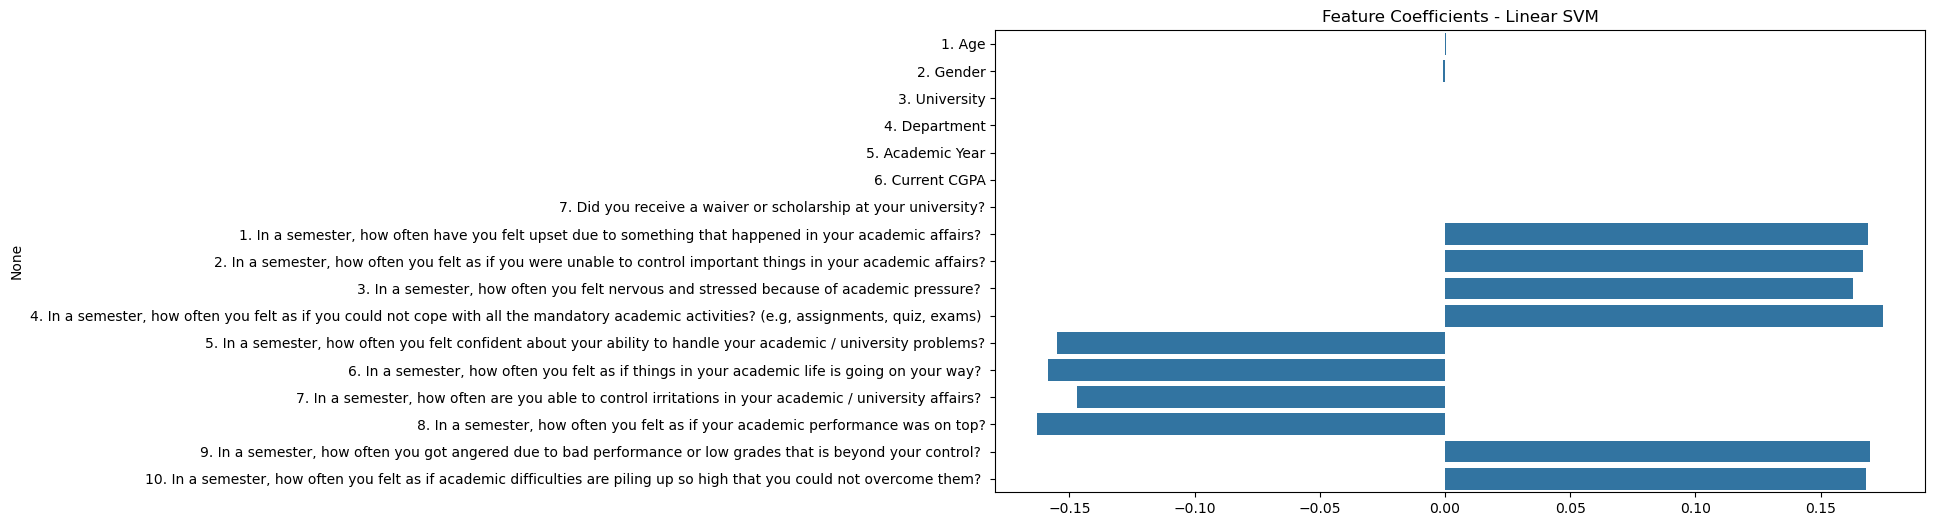

In [112]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train_scaled, y_train)

svm_coeff = svm_linear.coef_[0]
feature_names = X.columns

plt.figure(figsize=(12,6))
sns.barplot(x=svm_coeff, y=feature_names)
plt.title("Feature Coefficients - Linear SVM")
plt.show()


# Predict Stress for a New Student

In [114]:
import pandas as pd
new_user = {
    '1. Age': 1,  
    '2. Gender': 0,  
    '3. University': 2,  
    '4. Department': 1,  
    '5. Academic Year': 0,  
    '6. Current CGPA': 3.25,
    '7. Did you receive a waiver or scholarship at your university?': 0,
    # Note: Added trailing spaces to match dataset columns
    '1. In a semester, how often have you felt upset due to something that happened in your academic affairs? ': 2,
    '2. In a semester, how often you felt as if you were unable to control important things in your academic affairs?': 2,
    '3. In a semester, how often you felt nervous and stressed because of academic pressure? ': 3,
    '4. In a semester, how often you felt as if you could not cope with all the mandatory academic activities? (e.g, assignments, quiz, exams) ': 2,
    '5. In a semester, how often you felt confident about your ability to handle your academic / university problems?': 3,
    '6. In a semester, how often you felt as if things in your academic life is going on your way? ': 2,
    '7. In a semester, how often are you able to control irritations in your academic / university affairs? ': 3,
    '8. In a semester, how often you felt as if your academic performance was on top?': 2,
    '9. In a semester, how often you got angered due to bad performance or low grades that is beyond your control? ': 3,
    '10. In a semester, how often you felt as if academic difficulties are piling up so high that you could not overcome them? ': 2
}


new_user_df = pd.DataFrame([new_user])

new_user_df = new_user_df[X_train.columns]


new_user_scaled = scaler.transform(new_user_df)


predicted_stress_rf = rf.predict(new_user_df)
predicted_stress_svm = svm.predict(new_user_scaled)
predicted_stress_lr = lr.predict(new_user_scaled)

print("Predicted Stress Level (Random Forest):", predicted_stress_rf[0])
print("Predicted Stress Level (SVM):", predicted_stress_svm[0])
print("Predicted Stress Level (Logistic Regression):", predicted_stress_lr[0])


Predicted Stress Level (Random Forest): Moderate Stress
Predicted Stress Level (SVM): Moderate Stress
Predicted Stress Level (Logistic Regression): Moderate Stress


# Stress Prediction on Unseen Student Data

In [116]:
sample = X_test.iloc[0:1]  
predicted_stress_rf = rf.predict(sample)
print("Stress Prediction Done! Predicted Level (Random Forest):", predicted_stress_rf[0])

print("Stress Prediction successfully tested on a sample!")


Stress Prediction Done! Predicted Level (Random Forest): Moderate Stress
Stress Prediction successfully tested on a sample!


#  Stress Prediction for New User Data

In [118]:
import pandas as pd
import numpy as np

new_user = {
    '1. Age': 1,  
    '2. Gender': 0,  
    '3. University': 2, 
    '4. Department': 1,  
    '5. Academic Year': 0, 
    '6. Current CGPA': 1,  
    '7. Did you receive a waiver or scholarship at your university?': 0,
    
   
    '1. In a semester, how often have you felt upset due to something that happened in your academic affairs? ': 2,
    '2. In a semester, how often you felt as if you were unable to control important things in your academic affairs?': 2,
    '3. In a semester, how often you felt nervous and stressed because of academic pressure? ': 3,
    '4. In a semester, how often you felt as if you could not cope with all the mandatory academic activities? (e.g, assignments, quiz, exams) ': 2,
    '5. In a semester, how often you felt confident about your ability to handle your academic / university problems?': 3,
    '6. In a semester, how often you felt as if things in your academic life is going on your way? ': 2,
    '7. In a semester, how often are you able to control irritations in your academic / university affairs? ': 3,
    '8. In a semester, how often you felt as if your academic performance was on top?': 2,
    '9. In a semester, how often you got angered due to bad performance or low grades that is beyond your control? ': 3,
    '10. In a semester, how often you felt as if academic difficulties are piling up so high that you could not overcome them? ': 2
}


q_keys = [k for k in new_user.keys() if 'In a semester' in k]
new_user['Stress Value'] = sum([new_user[k] for k in q_keys])
print(f"Calculated Stress Value: {new_user['Stress Value']}")


try:
    new_user_df = pd.DataFrame([new_user])
    new_user_df = new_user_df[X_train.columns]

    print("\nNew User Data (Processed):")
    display(new_user_df)

    print("\n--- Predictions ---")
    rf_pred_label = rf.predict(new_user_df)[0]
    print(f"Random Forest Prediction: {rf_pred_label}")

    
    new_user_scaled = scaler.transform(new_user_df)
    svm_pred_label = svm.predict(new_user_scaled)[0]
    lr_pred_label = lr.predict(new_user_scaled)[0]

    print(f"SVM Prediction: {svm_pred_label}")
    print(f"Logistic Regression Prediction: {lr_pred_label}")

except KeyError as e:
    print(f"KeyError: {e} - Please verify column names against X_train.columns")
except Exception as e:
    print(f"An error occurred: {e}")

Calculated Stress Value: 24

New User Data (Processed):


,1. Age,2. Gender,3. University,4. Department,5. Academic Year,6. Current CGPA,7. Did you receive a waiver or scholarship at your university?,"1. In a semester, how often have you felt upset due to something that happened in your academic affairs?","2. In a semester, how often you felt as if you were unable to control important things in your academic affairs?","3. In a semester, how often you felt nervous and stressed because of academic pressure?","4. In a semester, how often you felt as if you could not cope with all the mandatory academic activities? (e.g, assignments, quiz, exams)","5. In a semester, how often you felt confident about your ability to handle your academic / university problems?","6. In a semester, how often you felt as if things in your academic life is going on your way?","7. In a semester, how often are you able to control irritations in your academic / university affairs?","8. In a semester, how often you felt as if your academic performance was on top?","9. In a semester, how often you got angered due to bad performance or low grades that is beyond your control?","10. In a semester, how often you felt as if academic difficulties are piling up so high that you could not overcome them?"
0,1,0,2,1,0,1,0,2,2,3,2,3,2,3,2,3,2



--- Predictions ---
Random Forest Prediction: Moderate Stress
SVM Prediction: Moderate Stress
Logistic Regression Prediction: Moderate Stress
